In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier



from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn import datasets, metrics, model_selection, svm



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

import warnings
warnings.filterwarnings("ignore")

from sqlalchemy import Table, Column, Float, Integer, BigInteger
import missingno as msno

from sklearn.feature_selection import SelectFromModel

In [ ]:
from pandas import read_csv

df = read_csv("Bankruptcy_data_Final.csv")

In [ ]:
df.shape

(92872, 13)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(92837, 13)

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(81177, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81177 entries, 1 to 92871
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EPS                 81177 non-null  float64
 1   Liquidity           81177 non-null  float64
 2   Profitability       81177 non-null  float64
 3   Productivity        81177 non-null  float64
 4   Leverage Ratio      81177 non-null  float64
 5   Asset Turnover      81177 non-null  float64
 6   Operational Margin  81177 non-null  float64
 7   Return on Equity    81177 non-null  float64
 8   Market Book Ratio   81177 non-null  float64
 9   Assets Growth       81177 non-null  float64
 10  Sales Growth        81177 non-null  float64
 11  Employee Growth     81177 non-null  float64
 12  BK                  81177 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 8.7 MB


In [ ]:
df.head()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
1,1.41,0.36,0.19,0.12,1.31,1.59,0.07,0.13,2.41,0.126,0.014,0.040,0
2,0.31,0.32,0.13,0.08,1.03,1.55,0.05,0.04,2.56,0.368,0.328,0.567,0
3,0.71,0.28,0.14,0.08,0.80,1.39,0.06,0.05,5.28,-0.021,-0.119,-0.096,0
4,0.75,0.41,0.13,0.08,0.20,1.30,0.06,0.04,8.68,0.233,0.147,0.053,0
5,1.50,0.37,0.16,0.11,0.34,1.41,0.08,0.08,7.82,0.132,0.232,0.077,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EPS,81177.0,-16.062561,2343.640196,-384000.000,-0.120,0.480,1.670,55339.00
Liquidity,81177.0,-1.007026,98.566561,-25968.520,0.030,0.190,0.390,1.00
Profitability,81177.0,-9.256572,269.838204,-26097.600,-0.390,0.110,0.340,140.58
Productivity,81177.0,-0.266984,6.994533,-1241.000,-0.020,0.060,0.120,35.92
Leverage Ratio,81177.0,1.505548,270.595276,-7811.000,0.010,0.330,0.860,75970.38
Asset Turnover,81177.0,1.124817,2.216899,-31.590,0.470,0.890,1.430,276.38
Operational Margin,81177.0,-7.543540,215.155854,-30175.700,-0.020,0.060,0.140,394.47
Return on Equity,81177.0,-2.709686,348.427121,-88875.140,-0.060,0.040,0.070,11228.85
Market Book Ratio,81177.0,422.500536,14390.411760,-2306965.030,12.460,60.730,249.490,1020718.45
Assets Growth,81177.0,0.967674,63.950542,-1.000,-0.045,0.055,0.189,14231.00


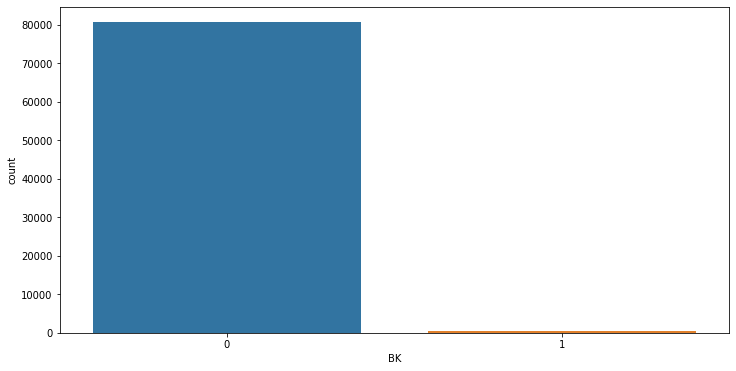

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df['BK'])
plt.show()

In [ ]:
df.corr()

,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
EPS,1.000000,-0.000053,-0.000224,-0.000210,0.000039,0.001236,-0.000217,0.264836,0.000231,0.000061,0.000075,0.000182,-0.007860
Liquidity,-0.000053,1.000000,0.601435,0.154382,0.000073,-0.056079,0.004052,0.830468,0.000825,0.000260,0.000133,0.000496,0.000522
Profitability,-0.000224,0.601435,1.000000,0.441691,0.000226,-0.147214,0.019652,0.308614,0.002899,0.000531,0.000314,0.001017,0.001237
Productivity,-0.000210,0.154382,0.441691,1.000000,0.000308,-0.191331,0.087915,0.005962,0.008771,0.000182,-0.000002,0.001199,-0.003119
Leverage Ratio,0.000039,0.000073,0.000226,0.000308,1.000000,-0.001423,0.000302,0.000006,0.057538,-0.000073,0.000094,-0.000067,-0.000184
Asset Turnover,0.001236,-0.056079,-0.147214,-0.191331,-0.001423,1.000000,0.017233,-0.004641,-0.006120,-0.002230,-0.000367,-0.003289,0.013142
Operational Margin,-0.000217,0.004052,0.019652,0.087915,0.000302,0.017233,1.000000,0.002121,0.009750,-0.001173,0.000392,0.000080,0.001469
Return on Equity,0.264836,0.830468,0.308614,0.005962,0.000006,-0.004641,0.002121,1.000000,0.000232,0.000148,0.000088,0.000287,-0.004798
Market Book Ratio,0.000231,0.000825,0.002899,0.008771,0.057538,-0.006120,0.009750,0.000232,1.000000,0.000077,-0.001398,0.000317,-0.002029
Assets Growth,0.000061,0.000260,0.000531,0.000182,-0.000073,-0.002230,-0.001173,0.000148,0.000077,1.000000,0.087775,0.015065,-0.001163


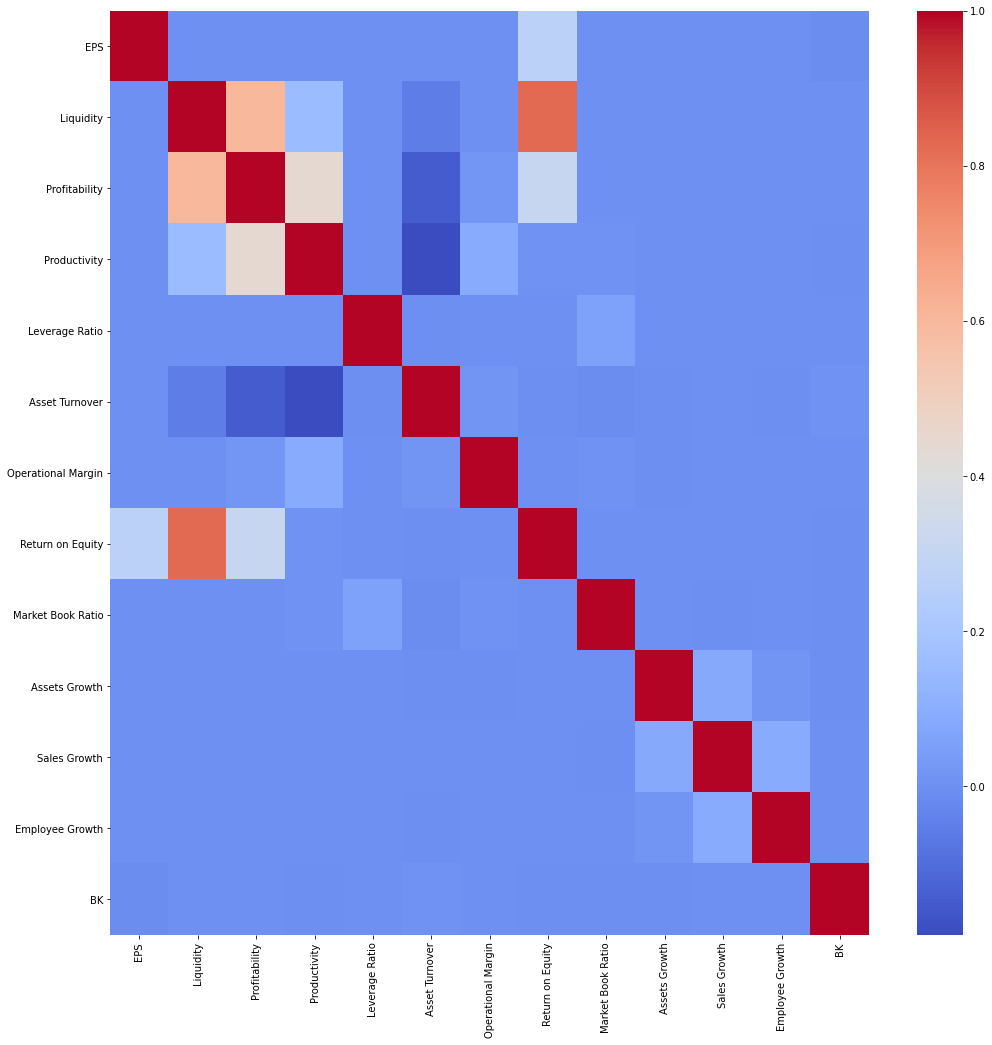

In [ ]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()

In [ ]:
X = df.copy()

In [ ]:
target_col = 'BK'

In [ ]:
X = df.drop([target_col], axis=1)
y = df[target_col]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,random_state=97, test_size=0.2)

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE(ratio = 0.5)
X_train, y_train = over.fit_resample(X_train, y_train)

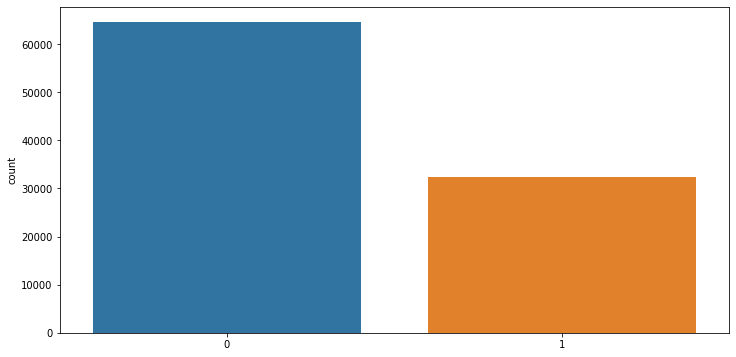

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y_train)
plt.show()

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(96844, 12) (96844,)
(16236, 12) (16236,)


In [ ]:
sum(y_train)

32281

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

Confusion Matrix 
 [[12721    29]
 [ 3420    66]]

f1_score 
 0.03686121195196872

average_precision_score 
 0.2237963808621278

recall_score 
 0.0189328743545611

Classification Report 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88     12750
           1       0.69      0.02      0.04      3486

    accuracy                           0.79     16236
   macro avg       0.74      0.51      0.46     16236
weighted avg       0.77      0.79      0.70     16236



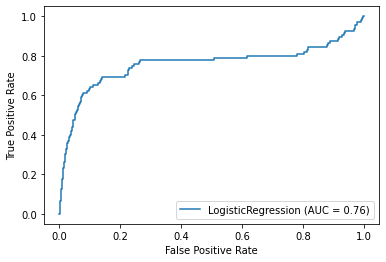

In [ ]:
classifier1 = LogisticRegression()
classifier1.fit(X_train_sc,y_train)
y_lr=classifier1.predict(X_test_sc)

print('Confusion Matrix \n',confusion_matrix(y_lr,y_test))
print()
print('f1_score \n', f1_score(y_lr,y_test))
print()
print('average_precision_score \n', average_precision_score(y_lr,y_test))
print()
print('recall_score \n', recall_score(y_lr,y_test))
print()
print('Classification Report \n',classification_report(y_lr,y_test))
metrics.plot_roc_curve(classifier1, X_test_sc, y_test)  
plt.show()  

Confusion Matrix 
 [[15833    60]
 [  308    35]]

f1_score 
 0.1598173515981735

average_precision_score 
 0.05656417466430304

recall_score 
 0.10204081632653061

Classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     15893
           1       0.37      0.10      0.16       343

    accuracy                           0.98     16236
   macro avg       0.67      0.55      0.57     16236
weighted avg       0.97      0.98      0.97     16236



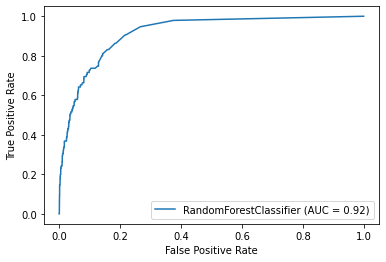

In [ ]:
classifier2 = RandomForestClassifier(max_depth=26, class_weight="balanced_subsample", criterion="gini", random_state=0)
classifier2.fit(X_train,y_train)
y_rfc=classifier2.predict(X_test)

print('Confusion Matrix \n',confusion_matrix(y_rfc,y_test))
print()
print('f1_score \n', f1_score(y_rfc,y_test))
print()
print('average_precision_score \n', average_precision_score(y_rfc,y_test))
print()
print('recall_score \n', recall_score(y_rfc,y_test))
print()
print('Classification Report \n',classification_report(y_rfc,y_test))
metrics.plot_roc_curve(classifier2, X_test, y_test)  
plt.show()  

Confusion Matrix 
 [[16054    88]
 [   87     7]]

f1_score 
 0.07407407407407406

average_precision_score 
 0.010845584736006171

recall_score 
 0.07446808510638298

Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     16142
           1       0.07      0.07      0.07        94

    accuracy                           0.99     16236
   macro avg       0.53      0.53      0.53     16236
weighted avg       0.99      0.99      0.99     16236



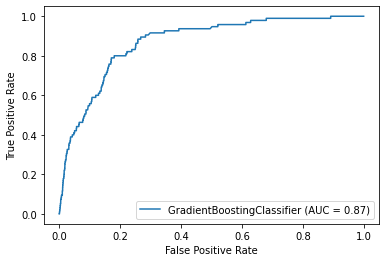

In [ ]:
classifier3 = GradientBoostingClassifier()
classifier3.fit(X_train_sc,y_train)
y_gbc=classifier3.predict(X_test_sc)

print('Confusion Matrix \n',confusion_matrix(y_gbc,y_test))
print()
print('f1_score \n', f1_score(y_gbc,y_test))
print()
print('average_precision_score \n', average_precision_score(y_gbc,y_test))
print()
print('recall_score \n', recall_score(y_gbc,y_test))
print()
print('Classification Report \n',classification_report(y_gbc,y_test))
metrics.plot_roc_curve(classifier3, X_test_sc, y_test)  
plt.show()  

Confusion Matrix 
 [[ 2106    17]
 [14035    78]]

f1_score 
 0.010979729729729729

average_precision_score 
 0.8689748629465396

recall_score 
 0.005526819244668036

Classification Report 
               precision    recall  f1-score   support

           0       0.13      0.99      0.23      2123
           1       0.82      0.01      0.01     14113

    accuracy                           0.13     16236
   macro avg       0.48      0.50      0.12     16236
weighted avg       0.73      0.13      0.04     16236



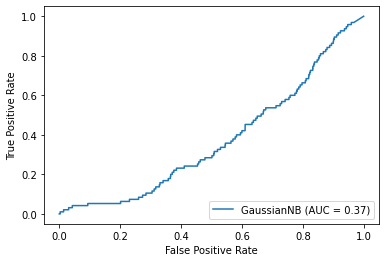

In [ ]:
classifier4 = GaussianNB()
classifier4.fit(X_train_sc,y_train)
y_gb=classifier4.predict(X_test_sc)

print('Confusion Matrix \n',confusion_matrix(y_gb,y_test))
print()
print('f1_score \n', f1_score(y_gb,y_test))
print()
print('average_precision_score \n', average_precision_score(y_gb,y_test))
print()
print('recall_score \n', recall_score(y_gb,y_test))
print()
print('Classification Report \n',classification_report(y_gb,y_test))
metrics.plot_roc_curve(classifier4, X_test_sc, y_test)  
plt.show()  